## Summer School on Deep Learning-2019 Surathkal, Karnataka

#### Importing libraries

In [1]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


#### Weight Initialization Module

In [0]:
class WeightCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch%1 == 0:
            fig, axs = plt.subplots(1,10, figsize=(10*1.5,1.5), facecolor='w', edgecolor='k')
            for i in range(10):
                axs[i].set_title("Digit : " + str(i))
                digit = model.layers[0].get_weights()[0][:,i]
                #digit = ((digit - digit.min())*(1/(digit.max() - digit.min()))*255).astype("uint8")
                axs[i].imshow(digit.reshape(28,28),cmap="viridis")

In [0]:
weight = WeightCallback()

#### Downloading MNIST dataset
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [11]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [12]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])
#print(xtrain.shape[3])

60000
28
28


**Visualizing MNIST data**

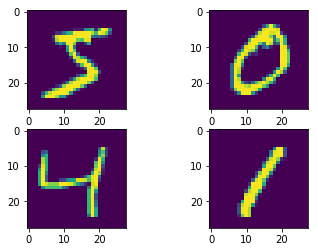

In [13]:
plt.subplot(221).imshow(xtrain[0],cmap='viridis')
plt.subplot(222).imshow(xtrain[1])
plt.subplot(223).imshow(xtrain[2])
plt.subplot(224).imshow(xtrain[3])

In [15]:
print(ytrain[0])

5


#### Reshape the data

In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],784).astype('float32')/255
xtest  = xtest.reshape(xtest.shape[0],784).astype('float32')/255
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


#### One hot encoding
* Some algorithms can work with categorical data directly. For example, a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).

* Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In [6]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


In [10]:
print(ytrain[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### Building the Model

In [0]:
import keras
from keras import models
from keras import layers

In [17]:
model = models.Sequential()
model.add(layers.Dense(10,input_shape = (784,), activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

#### Fit the Model

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 33us/step - loss: 1.5717 - acc: 0.6089 - val_loss: 1.0917 - val_acc: 0.7976
Epoch 2/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.9550 - acc: 0.8052 - val_loss: 0.7933 - val_acc: 0.8400
Epoch 3/20
48000/48000 [==============================] - 1s 20us/step - loss: 0.7628 - acc: 0.8348 - val_loss: 0.6662 - val_acc: 0.8567
Epoch 4/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.6675 - acc: 0.8474 - val_loss: 0.5950 - val_acc: 0.8637
Epoch 5/20
48000/48000 [==============================] - 1s 21us/step - loss: 0.6092 - acc: 0.8556 - val_loss: 0.5488 - val_acc: 0.8707
Epoch 6/20
48000/48000 [==============================] - 1s 20us/step - loss: 0.5692 - acc: 0.8609 - val_loss: 0.5159 - val_acc: 0.8758
Epoch 7/20
48000/48000 [==============================] - 1s 20us/step - loss: 0

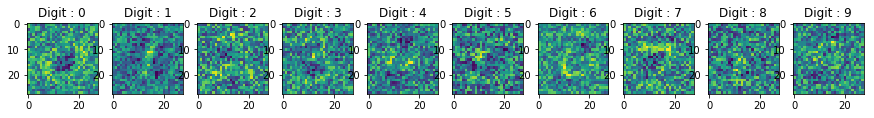

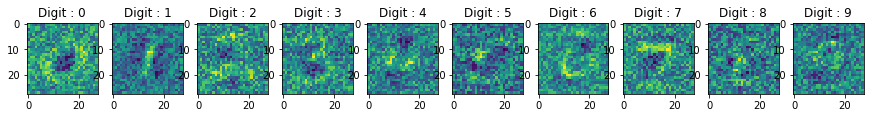

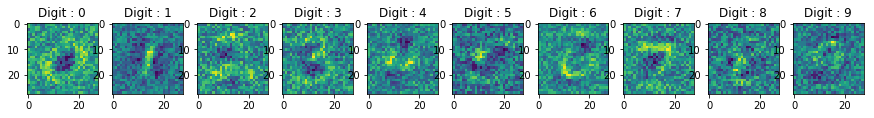

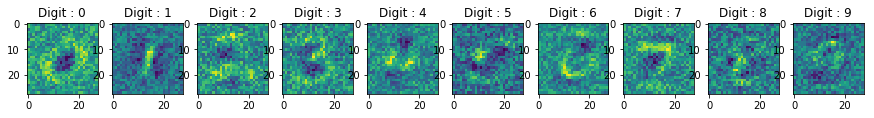

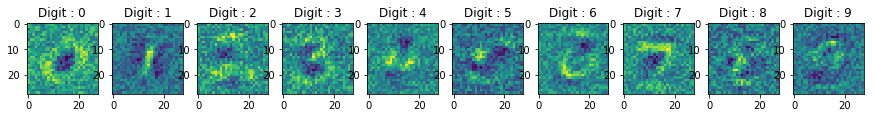

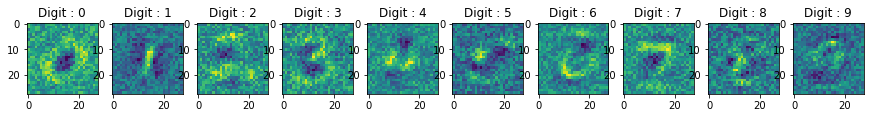

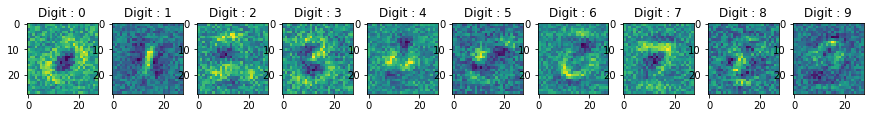

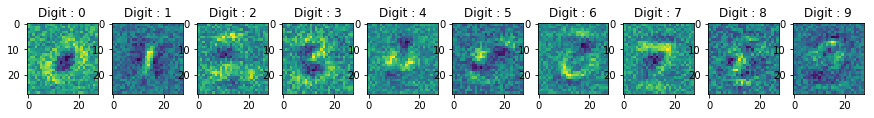

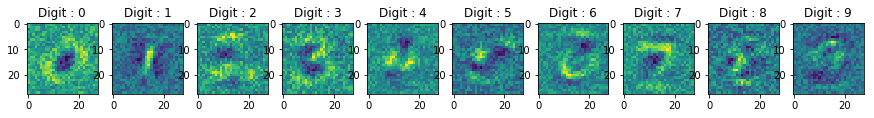

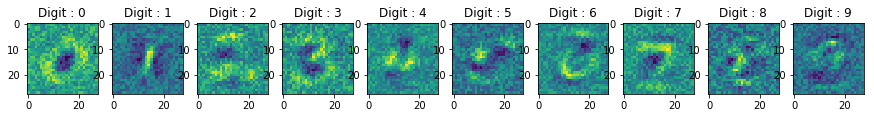

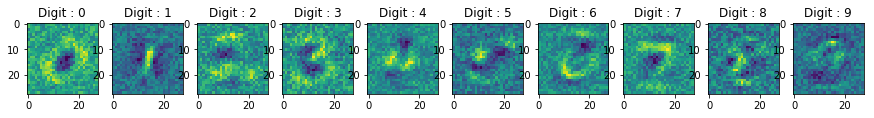

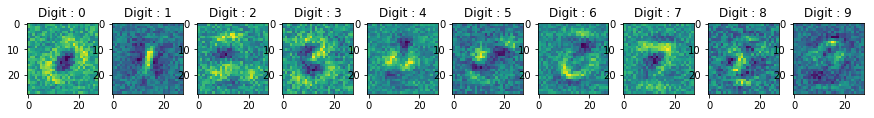

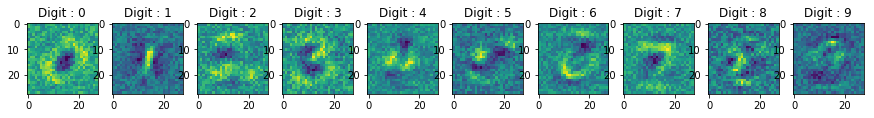

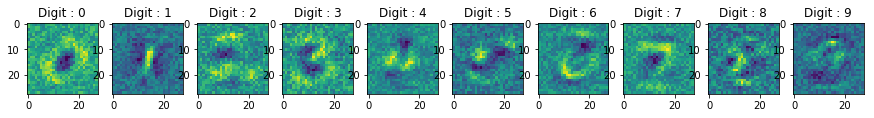

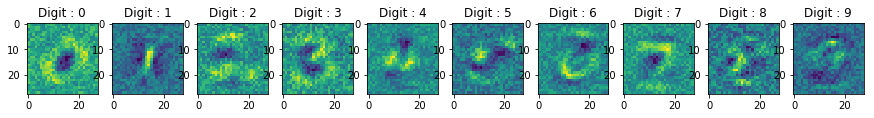

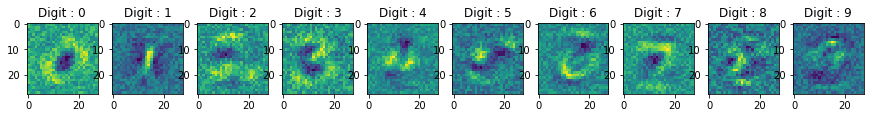

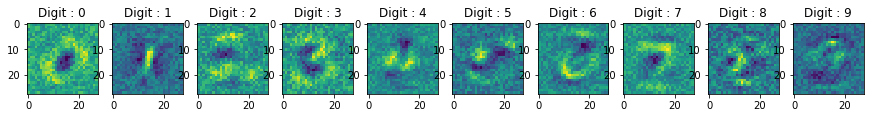

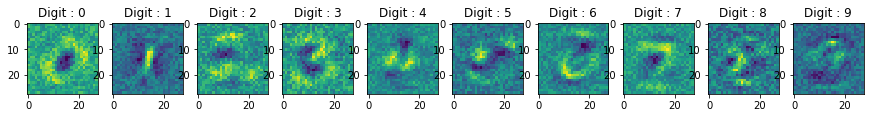

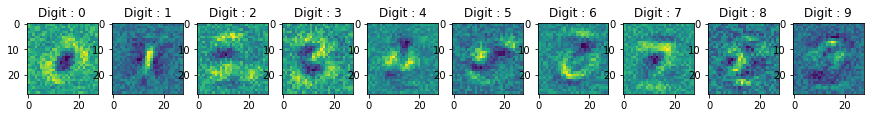

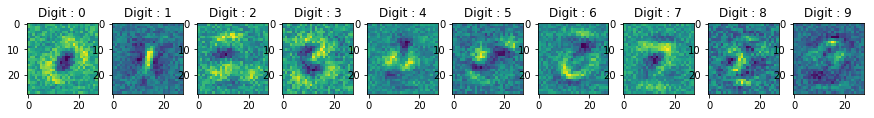

In [0]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200, callbacks= [weight],epochs=20, verbose=1)

**Evaluate the Model**

In [0]:
model.evaluate(xtest,ytest)

10000/10000 [==============================] - 0s 49us/step


[0.37973634568452835, 0.8995]

#### Assignment
*  Change the activation of first layer to 'relu'.

* Add one more dense layer with 10 neurons and 'softmax' Activation function 

In [0]:
''''model = models.Sequential()
model.add(layers.Dense(10, input_shape = (784,), activation=' '))
model.add(layers.Dense(, activation=' '))
model.summary()'''

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [0]:
'''model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])'''

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 38us/step - loss: 2.0458 - acc: 0.2600 - val_loss: 1.7625 - val_acc: 0.4093
Epoch 2/20
48000/48000 [==============================] - 1s 22us/step - loss: 1.5224 - acc: 0.5375 - val_loss: 1.2487 - val_acc: 0.6779
Epoch 3/20
48000/48000 [==============================] - 1s 22us/step - loss: 1.0733 - acc: 0.7292 - val_loss: 0.8803 - val_acc: 0.7919
Epoch 4/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.8033 - acc: 0.7937 - val_loss: 0.6901 - val_acc: 0.8279
Epoch 5/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.6654 - acc: 0.8239 - val_loss: 0.5909 - val_acc: 0.8462
Epoch 6/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.5862 - acc: 0.8410 - val_loss: 0.5284 - val_acc: 0.8593
Epoch 7/20
48000/48000 [==============================] - 1s 22us/step - loss: 0

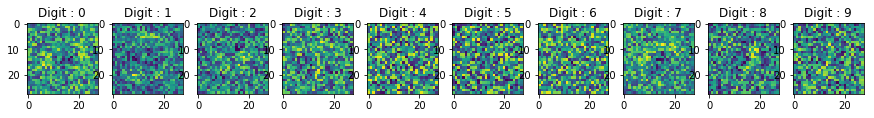

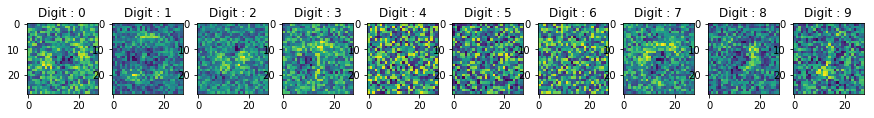

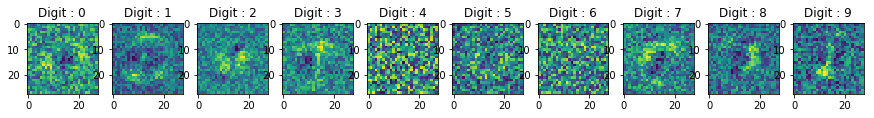

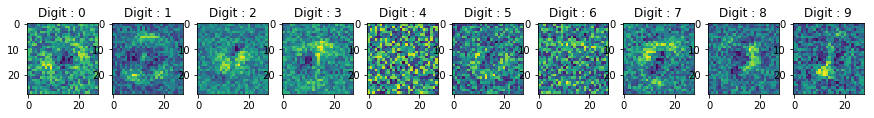

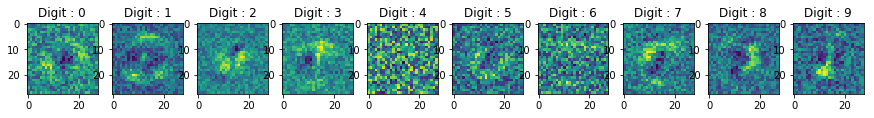

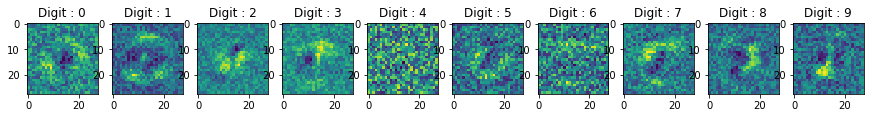

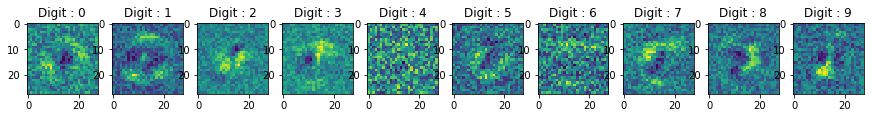

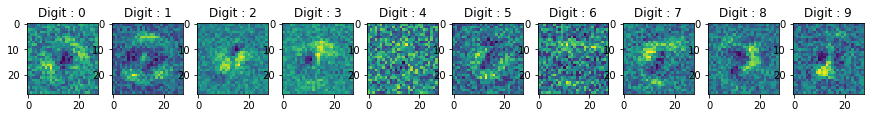

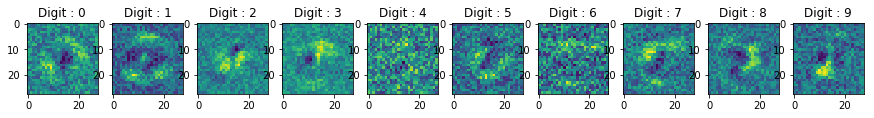

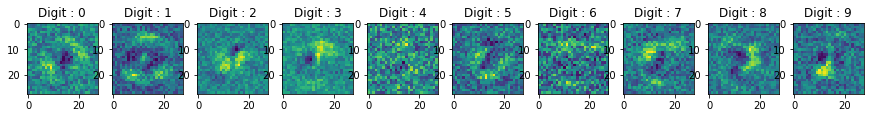

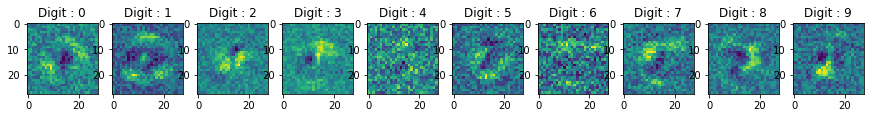

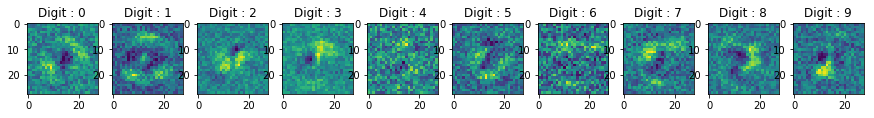

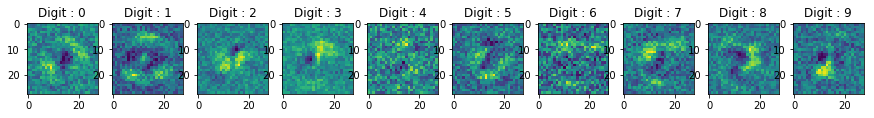

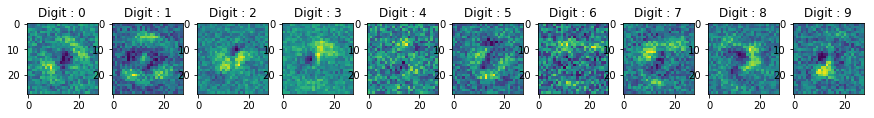

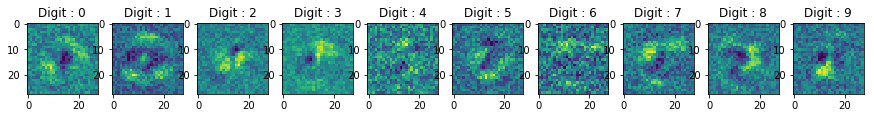

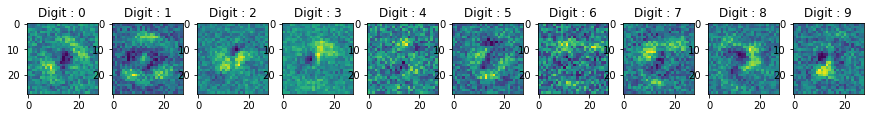

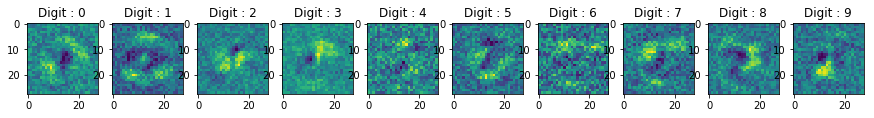

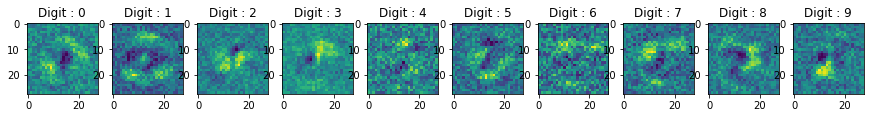

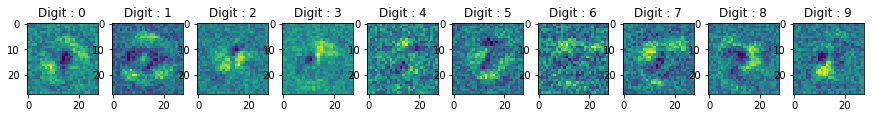

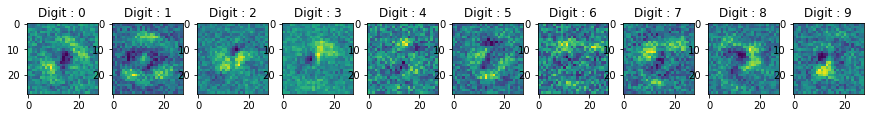

In [0]:
'''history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=200, callbacks=[weight],epochs=20, verbose=1)'''

**Evaluate**

In [0]:
model.evaluate(xtest,ytest)

10000/10000 [==============================] - 0s 46us/step


[0.3289420780301094, 0.9053]